d:\AI\assignment\Eighth\climate_impact_nepal\venv\Lib\site-packages\osgeo\gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


0: HDF4_EOS:EOS_GRID:"../../src/data/modis_snow_data/MOD10A1.A2000055.h16v00.061.2020037171823.hdf":MOD_Grid_Snow_500m:NDSI_Snow_Cover
1: HDF4_EOS:EOS_GRID:"../../src/data/modis_snow_data/MOD10A1.A2000055.h16v00.061.2020037171823.hdf":MOD_Grid_Snow_500m:NDSI_Snow_Cover_Basic_QA
2: HDF4_EOS:EOS_GRID:"../../src/data/modis_snow_data/MOD10A1.A2000055.h16v00.061.2020037171823.hdf":MOD_Grid_Snow_500m:NDSI_Snow_Cover_Algorithm_Flags_QA
3: HDF4_EOS:EOS_GRID:"../../src/data/modis_snow_data/MOD10A1.A2000055.h16v00.061.2020037171823.hdf":MOD_Grid_Snow_500m:NDSI
4: HDF4_EOS:EOS_GRID:"../../src/data/modis_snow_data/MOD10A1.A2000055.h16v00.061.2020037171823.hdf":MOD_Grid_Snow_500m:Snow_Albedo_Daily_Tile
5: HDF4_EOS:EOS_GRID:"../../src/data/modis_snow_data/MOD10A1.A2000055.h16v00.061.2020037171823.hdf":MOD_Grid_Snow_500m:orbit_pnt
6: HDF4_EOS:EOS_GRID:"../../src/data/modis_snow_data/MOD10A1.A2000055.h16v00.061.2020037171823.hdf":MOD_Grid_Snow_500m:granule_pnt
Snow array shape: (2400, 2400)


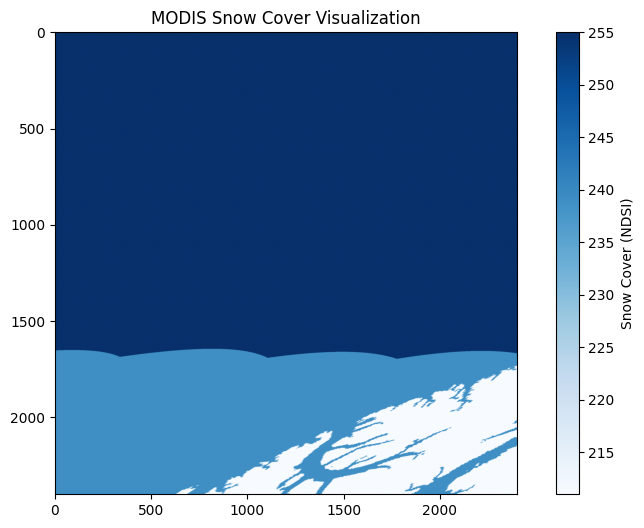

Saved GeoTIFF as: snow_cover.tif


In [1]:
## MODIS Snow Cover Preprocessing Notebook

### 🔹 Step 1: Load and Inspect the HDF File
from osgeo import gdal

# Path to the HDF file
hdf_path = "../../src/data/modis_snow_data/MOD10A1.A2000055.h16v00.061.2020037171823.hdf"

# Open the HDF file
hdf_ds = gdal.Open(hdf_path)

# List subdatasets
subdatasets = hdf_ds.GetSubDatasets()

# Display all available subdatasets
for i, sds in enumerate(subdatasets):
    print(f"{i}: {sds[0]}")

### 🔹 Step 2: Load the Snow Cover Subdataset
# Assume index 0 corresponds to 'NDSI_Snow_Cover'
snow_sds_path = subdatasets[0][0]
snow_ds = gdal.Open(snow_sds_path)

# Read as array
snow_array = snow_ds.ReadAsArray()
print("Snow array shape:", snow_array.shape)

### 🔹 Step 3: Visualize the Snow Cover
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.imshow(snow_array, cmap='Blues')
plt.colorbar(label='Snow Cover (NDSI)')
plt.title('MODIS Snow Cover Visualization')
plt.show()

### 🔹 Step 4: Export to GeoTIFF
# Define output path
output_tif = "snow_cover.tif"

# Create GeoTIFF
driver = gdal.GetDriverByName('GTiff')
out_ds = driver.Create(
    output_tif,
    snow_ds.RasterXSize,
    snow_ds.RasterYSize,
    1,
    gdal.GDT_Int16
)

# Set spatial reference
out_ds.SetGeoTransform(snow_ds.GetGeoTransform())
out_ds.SetProjection(snow_ds.GetProjection())
out_ds.GetRasterBand(1).WriteArray(snow_array)
out_ds.FlushCache()
out_ds = None
print("Saved GeoTIFF as:", output_tif)

### ✅ All done!


In [2]:
# Check the geotransform and projection of the snow cover data
print("GeoTransform:", snow_ds.GetGeoTransform())  # Transformation parameters
print("Projection:", snow_ds.GetProjection())  # CRS info


GeoTransform: (-2223901.039333, 463.3127165274999, 0.0, 10007554.677, 0.0, -463.3127165279165)
Projection: PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [4]:
geotransform = snow_ds.GetGeoTransform()

# Calculate the min and max coordinates
min_x = geotransform[0]  # Top left x
max_y = geotransform[3]  # Top left y
pixel_width = geotransform[1]  # Pixel size in x
pixel_height = geotransform[5]  # Pixel size in y (negative, because y-coordinates decrease downwards)

max_x = min_x + (snow_array.shape[1] * pixel_width)  # Bottom right x
min_y = max_y + (snow_array.shape[0] * pixel_height)  # Bottom right y

# Print the bounding box coordinates (min_x, min_y, max_x, max_y)
print(f"Bounding Box: MinX={min_x}, MinY={min_y}, MaxX={max_x}, MaxY={max_y}")


Bounding Box: MinX=-2223901.039333, MinY=8895604.157333, MaxX=-1111950.519667, MaxY=10007554.677
